In [14]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
#Retrieve data
nyse=pd.read_excel('listings.xlsx', sheet_name='nyse', na_values=['n/a'])

#check
nyse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           3147 non-null   object 
 1   Company Name           3147 non-null   object 
 2   Last Sale              3079 non-null   float64
 3   Market Capitalization  3147 non-null   float64
 4   IPO Year               1361 non-null   float64
 5   Sector                 2177 non-null   object 
 6   Industry               2177 non-null   object 
dtypes: float64(3), object(4)
memory usage: 172.2+ KB


In [16]:
nyse.Sector.nunique()

12

In [17]:
nyse.columns

Index(['Stock Symbol', 'Company Name', 'Last Sale', 'Market Capitalization',
       'IPO Year', 'Sector', 'Industry'],
      dtype='object')

In [18]:
#Another way to present the observations in the Sector column to find the mode
nyse['Sector'].value_counts()

Consumer Services        448
Finance                  351
Energy                   226
Public Utilities         208
Basic Industries         205
Capital Goods            183
Technology               160
Consumer Non-Durables    115
Health Care              107
Transportation            65
Consumer Durables         58
Miscellaneous             51
Name: Sector, dtype: int64

In [19]:
# Apply the call function on each column
# Use lambda the "anonymous function", which recieves each column as argument x
nyse.apply(lambda x: x.nunique())

Stock Symbol             3147
Company Name             2533
Last Sale                2368
Market Capitalization    2478
IPO Year                   33
Sector                     12
Industry                  131
dtype: int64

Steps to calculate market cap for each sector

1-Divide the market cap to convert to millions

2-Drop the original column

3-Group data by sectro

4-Calculate market cap for each sector


In [20]:
# Divde the market cap into million dollar units, make new column, drop old
# with axis=1 to remind pandas its a column, not row
nyse['market_cap_m'] = nyse['Market Capitalization'].div(1e6)
nyse= nyse.drop('Market Capitalization', axis=1)

In [21]:
# Create grouby object
nyse_by_sector = nyse.groupby('Sector')


In [22]:
# Iterate over the object in loop
for sector, data in nyse_by_sector:
    print (sector, data.market_cap_m.mean())

Basic Industries 9590.514730016439
Capital Goods 10166.901283563553
Consumer Durables 5854.1216802827585
Consumer Non-Durables 17798.582071918783
Consumer Services 6766.35833582702
Energy 12915.331006286578
Finance 13880.683382706504
Health Care 28562.816767372056
Miscellaneous 18594.16551888784
Public Utilities 13412.55540738509
Technology 9790.156572226737
Transportation 8491.577404262538


In [23]:
# Keep it simple and skip the loop
mcap_by_sector = nyse_by_sector.market_cap_m.mean()
mcap_by_sector

Sector
Basic Industries          9590.514730
Capital Goods            10166.901284
Consumer Durables         5854.121680
Consumer Non-Durables    17798.582072
Consumer Services         6766.358336
Energy                   12915.331006
Finance                  13880.683383
Health Care              28562.816767
Miscellaneous            18594.165519
Public Utilities         13412.555407
Technology                9790.156572
Transportation            8491.577404
Name: market_cap_m, dtype: float64

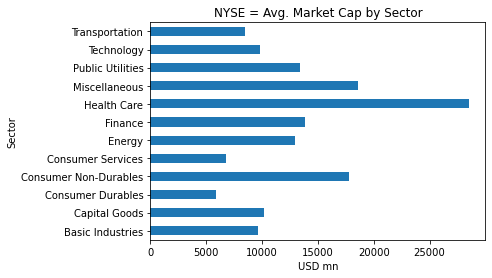

In [24]:
#Visualize the summary
title= 'NYSE = Avg. Market Cap by Sector'
mcap_by_sector.plot(kind='barh', title=title)
plt.xlabel('USD mn')
plt.show()

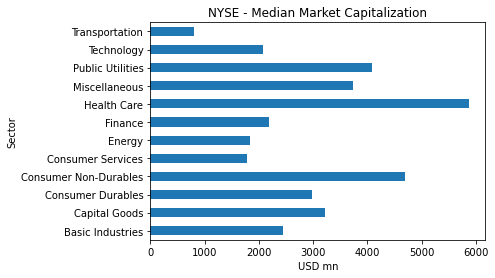

In [26]:
# Calculate median
median_mcap_by_sector = nyse_by_sector.market_cap_m.median()

# Plot and show as horizontal bar chart
median_mcap_by_sector.plot(kind='barh', title='NYSE - Median Market Capitalization')

# Add the label
plt.xlabel('USD mn')

# Show the plot
plt.show()

In [27]:
# Aggregate summary for all numeric columns
nyse_by_sector.mean()

,Last Sale,IPO Year,market_cap_m
Sector,,,
Basic Industries,39.970990,2008.393939,9590.514730
Capital Goods,68.115082,2006.754098,10166.901284
Consumer Durables,56.791724,2006.052632,5854.121680
Consumer Non-Durables,49.625351,2007.574468,17798.582072
Consumer Services,41.385346,2008.337500,6766.358336
Energy,29.145299,2008.699115,12915.331006
Finance,46.251623,2009.250000,13880.683383
Health Care,65.695140,2008.883721,28562.816767
Miscellaneous,52.180196,2009.360000,18594.165519


Analyze how market capitalization has evolved for different IPO years

<ipython-input-28-45d1d8eaf4c2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyse['IPO Year'] = nyse['IPO Year'].dropna().astype(int)


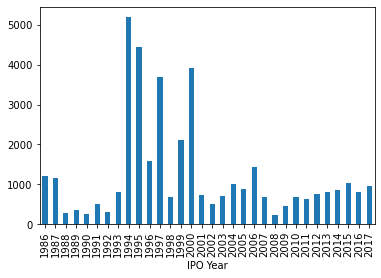

In [28]:
# Select companies with IPO after 1985
nyse = nyse[nyse['IPO Year'] > 1985]

# Drop missing values and convert to integers
nyse['IPO Year'] = nyse['IPO Year'].dropna().astype(int)

# Calculate the median market cap by IPO Year and sort the index
ipo_by_year = nyse.groupby('IPO Year').market_cap_m.median().sort_index()

# Plot results as a bar chart
ipo_by_year.plot(kind='bar')

# Show the plot
plt.show()

After 1985, the year 1994 had the highest median market capitalization.